# IMPORTANDO BIBLIOTECAS NECESSÁRIAS

In [1]:
import pandas as pd
import io
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import seaborn as sns; sns.set()
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# BASE DE DADOS

In [2]:
table = pd.read_csv('iris.csv')

In [3]:
table.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# PREPARANDO OS CONJUNTOS

In [4]:
data = np.array(table)

data = data[:, 1:] # remover essa linha caso a primeira coluna corresponda a dados relevantes

# Indentificando os rótulos das classes
labels = []
for line in range(data.shape[0]):
  if(labels.count(data[line, data.shape[1]-1])==0):
    labels.append(data[line, data.shape[1]-1])

scaler = StandardScaler() # normalização dos dados
# colocar as entradas da rede em uma escala próxima

y = np.array(pd.get_dummies(data[:, data.shape[1]-1])).astype(np.float32)
x = (data[:, :(data.shape[1]-1)]).astype(np.float32)

scaler.fit(x) # ajuste do scaler para pré-processamento

# Gerando os conjuntos de treinamento e teste (validação)
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.25) # 0.25 dos dados no conjunto de teste

print('Conjuntos de treinamento e teste separados!')

Conjuntos de treinamento e teste separados!


In [5]:
#[2.2] Formação dos conjuntos de treinamento e teste

data = np.array(table)

data = data[:, 1:] # remover essa linha caso a primeira coluna corresponda a dados relevantes

scaler = StandardScaler()
scaler.fit(data[:, :(data.shape[1]-1)]) # ajuste do scaler para pré-processamento

# Indentificando os rótulos das classes
labels = []
for line in range(data.shape[0]):
  if(labels.count(data[line, data.shape[1]-1])==0):
    labels.append(data[line, data.shape[1]-1])

# Contando o número de dados (amostras) em cada classe
num_labels = [] # lista com número de amostras por classe
ctrl = [] # lista usada na separação entre treinamento e teste
for label in labels:
  count = 0
  for line in range(data.shape[0]):
    if(label == data[line, data.shape[1]-1]):
      count = count + 1
  num_labels.append(count)
  ctrl.append(0)

# num_labels passa a conter o número de elementos por classe no conjunto de treinamento
train_p = 0.75 # percentual dos dados na lista de treinamento
for i in range(len(num_labels)):
  num_labels[i] = round(num_labels[i] * train_p)

train = int(0) # atribuir 0 seria suficiente, mas resolvi garantir
test = int(0)

# separação dos conjuntos de treinamento (train) e teste (test)
for line in range(data.shape[0]):
  for label in labels:
    if(label == data[line, data.shape[1]-1]):      
      aux = labels.index(label) 
      
      if (ctrl[aux] < num_labels[aux]):
        if (type(train) is int):
          train = data[line, :]
        else:
          train = np.row_stack((train, data[line, :]))      
      else:
        if (type(test) is int):
          test = data[line, :]
        else:
          test = np.row_stack((test, data[line, :]))
      ctrl[aux] = ctrl[aux]+1
      break

train_x = (train[:, :train.shape[1]-1]).astype(np.float32) # entradas de train
train_y = np.array(pd.get_dummies(train[:, train.shape[1]-1])).astype(np.float32)  # saídas (classes) de train
test_x = (test[:, :test.shape[1]-1]).astype(np.float32) # entradas de test
test_y = np.array(pd.get_dummies(test[:, test.shape[1]-1])).astype(np.float32) # saídas (classes) de test

print('Conjuntos de treinamento e teste separados!')

Conjuntos de treinamento e teste separados!


# TOPOLOGIA E TREINAMENTO

Ajustando a topologia...
Entradas = 4
Saídas = 3
Número de camadas ocultas: 1
Neurônios na camada oculta: 8


Treinamento...
Número de épocas de treinamento: 1000
MLPClassifier(alpha=0.1, hidden_layer_sizes=(8,), learning_rate='adaptive',
              learning_rate_init=0.01, max_iter=1000, random_state=121,
              solver='sgd', verbose=0)
Topologia da MLP = [4, 8, 3]


Text(0, 0.5, 'perda')

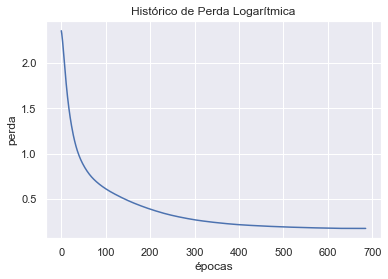

In [5]:
# [3] MLP: topologia e treinamento
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

print('Ajustando a topologia...')
num_x = train_x.shape[1]
num_y = train_y.shape[1]
print('Entradas = %i\nSaídas = %i' % (num_x, num_y))

while(True):
  num_hidden_layers = int(input('Número de camadas ocultas: '))
  if(num_hidden_layers>0):
    break

if(num_hidden_layers==1):
  while(True):
    topology = [int(input('Neurônios na camada oculta: '))]
    if(topology[0]>0):
      break
else:
  topology = []
  for i in range(num_hidden_layers):
    while(True):
      num = int(input('Neurônios na %iª camada oculta: ' % (i+1)))
      if(num>0):
        topology.append(num)
        break

print('\n\nTreinamento...')

epochs = int(input('Número de épocas de treinamento: '))

# inicialização do modelo
Model = MLPClassifier(hidden_layer_sizes=tuple(topology), max_iter=epochs, alpha=0.1,
                     solver='sgd', learning_rate_init=0.01, momentum=0.9, learning_rate='adaptive', verbose=0,  random_state=121) # verbose=1 exibe o log de treinamento

topology.insert(0, num_x)
topology.append(num_y)

# pré-processamento
p_train_x = scaler.transform(train_x)

# treinando o modelo
model = Model.fit(p_train_x, train_y)

print(model)
print('Topologia da MLP =', topology)

# exibindo a curva de perda logarítmica
plt.plot(model.loss_curve_)
plt.title('Histórico de Perda Logarítmica')
plt.xlabel('épocas')
plt.ylabel('perda')

# ANALISANDO O CONJUNTO DE TREINAMENTO

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.97      0.88      0.92        33
           2       0.91      0.98      0.94        41

   micro avg       0.96      0.96      0.96       112
   macro avg       0.96      0.95      0.95       112
weighted avg       0.96      0.96      0.96       112
 samples avg       0.96      0.96      0.96       112

A acurácia é  0.9553571428571429


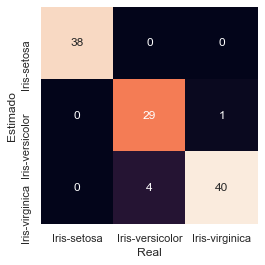

In [6]:
# [4] Análise do conjunto de treinamento
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

train_est_y = model.predict(p_train_x)

# matriz de confusão
mat = confusion_matrix(train_y.argmax(axis=1), train_est_y.argmax(axis=1))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Real')
plt.ylabel('Estimado');

print(classification_report(train_y, train_est_y)) # mostra relatório
print('A acurácia é ',accuracy_score(train_est_y, train_y)) # exibe acurácia

# ANALISANDO O CONJUNTO DE TESTE

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00        12

   micro avg       0.97      1.00      0.99        36
   macro avg       0.97      1.00      0.99        36
weighted avg       0.97      1.00      0.99        36
 samples avg       0.99      1.00      0.99        36

A acurácia é  0.9722222222222222


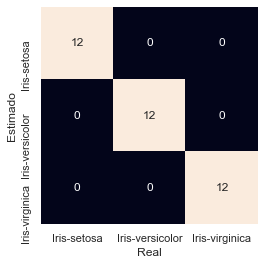

In [8]:
# [5] Análise do conjunto de teste
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# pré-processamento
p_test_x = scaler.transform(test_x)

test_est_y = model.predict(p_test_x)

# matriz de confusão
mat = confusion_matrix(test_y.argmax(axis=1), test_est_y.argmax(axis=1))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Real')
plt.ylabel('Estimado');

print(classification_report(test_y, test_est_y)) # mostra relatório
print('A acurácia é ',accuracy_score(test_est_y, test_y)) # exibe acurácia
